## Get insights about the performance of various cricket teams 
##### DATA Source: http://stats.espncricinfo.com is used to scrap the necessary data

#### Choose the teams from a list of given teams and subsequently print those teams

In [2]:
team_dict={"India":6,"Australia":2,"England":1,"South Africa":3,"West Indies":4,"New Zealand":5,"Pakistan":7,"Sri Lanka":8
           ,"Zimbabwe":9}

print ("Choose Teams of your choice for visualisation:\n")
team_choices=[]
for team in team_dict.keys():
    choice= input("\nDo you want {}? Enter (y/n):".format(team))
    if choice=='y' or choice=='Y':
        team_choices.append(team)
    if (input("Do you want to skip adding more teams (y/n)?")=='y'):
        break

#print choosen teams
print ("The Chosen teams are:")        
print (team_choices)    

Choose Teams of your choice for visualisation:


Do you want India? Enter (y/n):y
Do you want to skip adding more teams (y/n)?n

Do you want Australia? Enter (y/n):y
Do you want to skip adding more teams (y/n)?n

Do you want England? Enter (y/n):y
Do you want to skip adding more teams (y/n)?n

Do you want South Africa? Enter (y/n):y
Do you want to skip adding more teams (y/n)?n

Do you want West Indies? Enter (y/n):n
Do you want to skip adding more teams (y/n)?n

Do you want New Zealand? Enter (y/n):n
Do you want to skip adding more teams (y/n)?n

Do you want Pakistan? Enter (y/n):y
Do you want to skip adding more teams (y/n)?y
The Chosen teams are:
['India', 'Australia', 'England', 'South Africa', 'Pakistan']


#### For the chosen teams let us scrape the required stats of Win and Loose from 1971 onwards

In [3]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
common_url="http://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;filter=advanced;orderby=year;orderbyad=reverse;size=100;team=x;template=results;type=team;view=year;wrappertype=print"

team_df_dict={}
for team in team_choices:
    tic=time.clock()
    print ("\nScraping starting for:{}".format(team))
    choice=team_dict[team]
    team_url=common_url.replace("team=x","team={}".format(choice))
    response = requests.get(team_url)
    html = response.content
    soup = BeautifulSoup(html, 'html.parser')
    table=soup.find('caption', text = 'By year of match start').find_parent('table', {'class': 'engineTable'})
    #get Head and and data rows
    head= table.find('tr',{'class':'head'})
    rows=table.find_all('tr',{'class':'data1'})
    #get col_names
    columns=[]
    for th in head.find_all('th'):
        columns.append(th.get_text())
    #df for each of the teams
    team_df=pd.DataFrame(columns=columns)
    for row in rows:
        temp_df=pd.DataFrame(columns=columns)
        col_data=row.find_all('td')
        for i,col in enumerate(columns):
            temp_df[col]=[col_data[i].get_text()]
        team_df=team_df.append(temp_df,ignore_index=True)
    team_df_dict[team]=team_df
    print ("Scraping end for:{}, Time taken={}s".format(team,time.clock()-tic))


Scraping starting for:India
Scraping end for:India, Time taken=2.8136323517337636s

Scraping starting for:Australia
Scraping end for:Australia, Time taken=1.682858127617067s

Scraping starting for:England
Scraping end for:England, Time taken=2.0296985754946766s

Scraping starting for:South Africa
Scraping end for:South Africa, Time taken=1.6018081707216947s

Scraping starting for:Pakistan
Scraping end for:Pakistan, Time taken=1.7292293850406413s


##### The scraped data looks like:

In [5]:
team_df.head()

,Team,Mat,Won,Lost,Tied,NR,W/L,Ave,RPO,Inns,HS,LS,Year
0,Pakistan,5,0,5,0,0,0.000,23.34,4.86,5,262,74,2018
1,Pakistan,18,12,6,0,0,2.000,40.99,5.36,18,338,164,2017
2,Pakistan,11,5,6,0,0,0.833,36.08,5.85,11,337,210,2016
3,Pakistan,27,12,14,0,1,0.857,33.61,5.34,27,375,160,2015
4,Pakistan,16,6,10,0,0,0.600,28.86,5.29,16,364,102,2014


#### Clean and Prepare the data for visualisation

In [7]:
for team in team_choices:
    team_df=team_df_dict[team]
    for col in ['Mat','Won','Year']:
        team_df[col]=pd.to_numeric(team_df[col])
    team_df.index=team_df['Year']
    team_df.drop(['Year'], axis = 1, inplace = True)
    team_df=team_df.sort_index()
    team_df['Win pc']=team_df['Won']/team_df['Mat']
    team_df_dict[team]=team_df

final_df=pd.DataFrame()
for team in team_choices:
    team_df=team_df_dict[team]
    final_df=pd.concat([final_df,team_df['Win pc']], axis=1,ignore_index=True)
final_df.columns=team_choices

Periods=[]
for i in final_df.index:
    if (i>=1970 and i<1980):
        Periods.append('1970s')
    elif (i>=1980 and i<1990):
        Periods.append('1980s')
    elif (i>=1990 and i<2000):
        Periods.append('1990s')
    elif (i>=2000 and i<2010):
        Periods.append('2000s')
    else:
        Periods.append('modern')
        
final_df['period']=Periods

##### After Cleaning the data looks like:

In [8]:
final_df.head()

,India,Australia,England,South Africa,Pakistan,period
Year,,,,,,
1971,NaN,1.000000,0.000000,NaN,NaN,1970s
1972,NaN,0.333333,0.666667,NaN,NaN,1970s
1973,NaN,NaN,0.500000,NaN,0.000000,1970s
1974,0.000000,1.000000,0.500000,NaN,1.000000,1970s
1975,0.333333,0.571429,0.571429,NaN,0.333333,1970s


### Plot the Win % of the teams over the years

<IPython.core.display.Javascript object>


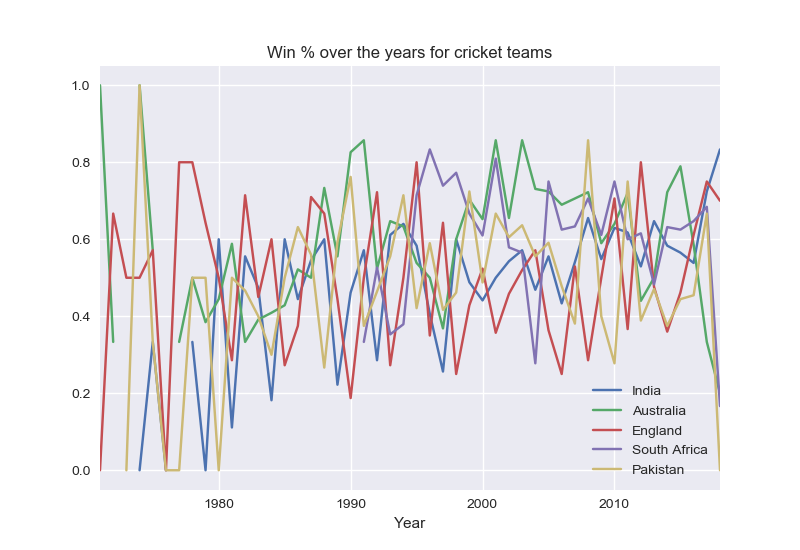

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
plt.style.use('seaborn')

final_df.plot(title="Win % over the years for cricket teams")


##### It is hard to realise anything specific from the above graph. Hence let us narrow down a bit
* Let us focus on India, Pakistan and Australia
* Let us limit ourselves to period from 1990 onwards
* Let us prevent ourselves from usin 2018 (as it current year)

<IPython.core.display.Javascript object>


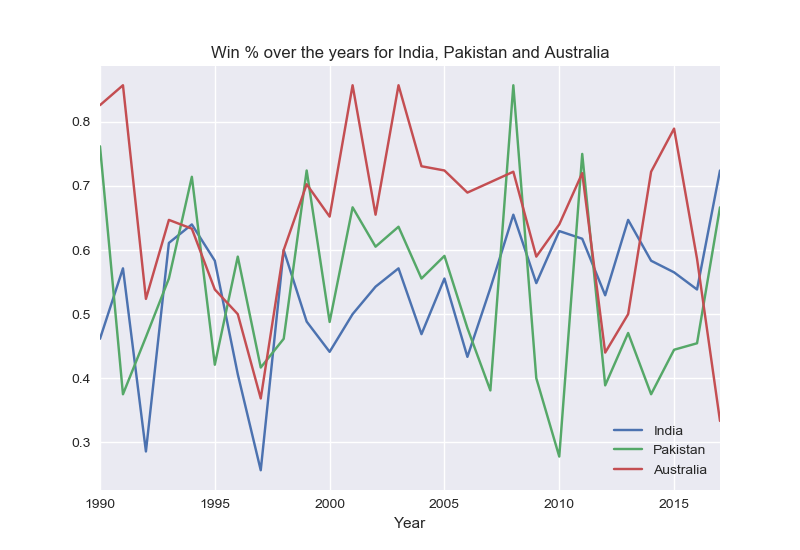

In [25]:
new_df=final_df.drop([2018],axis=0,inplace=False)
new_df[["India","Pakistan","Australia"]][new_df.index>=1990].plot(title="Win % over the years for India, Pakistan and Australia")

#### Key Insights:
* We see that the performance of India has considerably improved since the 2000s and especially after 2007 (MS Dhoni made Captain) 
* Also Australia by far remains the best of the 3 teams [ with 4 World Cup Wins in 1999, 2003, 2007 and 2015] for the most part

<IPython.core.display.Javascript object>


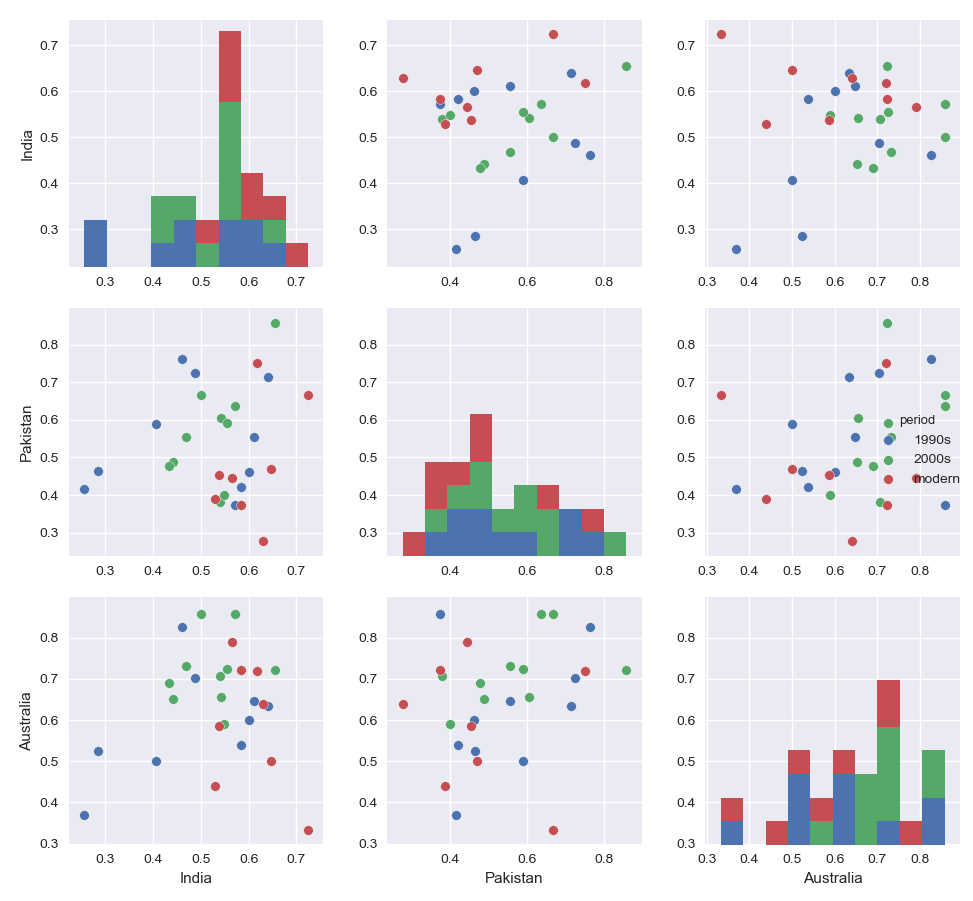

In [70]:
sns.pairplot(new_df[["India","Pakistan","Australia","period"]][new_df.index>=1990],hue='period', diag_kind='hist', size=3);

##### Above plot describes the relation between India, Pakistan and Australia through the combined use of scatter plots and histograms

<IPython.core.display.Javascript object>


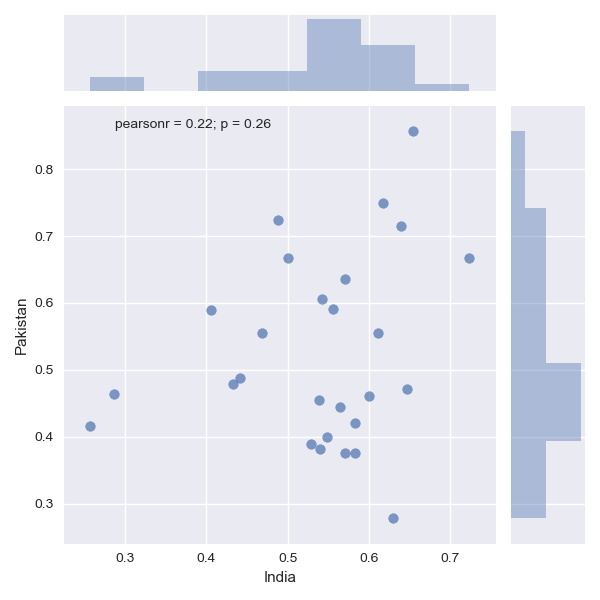

In [44]:
sns.jointplot(new_df["India"][new_df.index>1990],new_df["Pakistan"][new_df.index>1990],alpha=0.7)

#### We se that between India and Pakistan Win % of India is tilted towards the higher side
## Final Visualisation : "Jack of all trades"

<IPython.core.display.Javascript object>


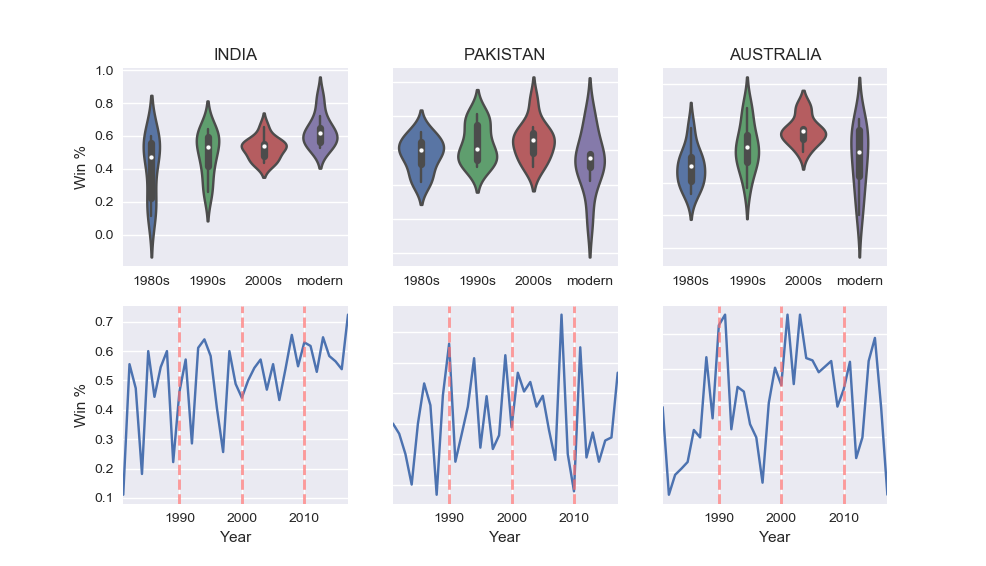

Text(0,0.5,'Win %')

In [69]:
fig=plt.figure()

#For India
plt.subplot(231)
plt.gca().set_title("INDIA")
sns.violinplot('period', 'India', data=final_df[final_df.index>1980],sharey=True);
plt.gca().set_ylabel("Win %")
xlabel=plt.gca().set_xlabel("")
plt.subplot(234)
new_df["India"][new_df.index>1980].plot(sharey=True)
ax=plt.gca()
years=[1980,1990,2000,2010]
for year in years:
    ax.axvline(year,color=(254/255,111/255,110/255),linestyle='dashed',linewidth=2,alpha=0.7)
ax.set_ylabel("Win %")

#For Pakistan
plt.subplot(232)
plt.gca().set_title("PAKISTAN")
sns.violinplot('period', 'Pakistan', data=final_df[final_df.index>1980],sharey=True);
plt.gca().set_ylabel("Win %")
xlabel=plt.gca().set_xlabel("")
plt.subplot(235)
new_df["Pakistan"][new_df.index>1980].plot(sharey=True)
ax=plt.gca()
years=[1980,1990,2000,2010]
for year in years:
    ax.axvline(year,color=(254/255,111/255,110/255),linestyle='dashed',linewidth=2,alpha=0.7)
ax.set_ylabel("Win %")

#For Australia
plt.subplot(233)
plt.gca().set_title("AUSTRALIA")
sns.violinplot('period', 'Australia', data=final_df[final_df.index>1980],sharey=True);
plt.gca().set_ylabel("Win %")
xlabel=plt.gca().set_xlabel("")
plt.subplot(236)
new_df["Australia"][new_df.index>1980].plot(sharey=True)
ax=plt.gca()
years=[1980,1990,2000,2010]
for year in years:
    ax.axvline(year,color=(254/255,111/255,110/255),linestyle='dashed',linewidth=2,alpha=0.7)
ax.set_ylabel("Win %")

The above plot culminates this project with a variety of information lefr to be infered. The top plots are **violin plots** [ box plot + kde plot] while lower ones are line plots:

1. **Median decedal Perfromance** of India has consistently improved from 1980s. *(See white dots of the top plot)*
2. The same has started to drop after achieving a peak in "2000s" for Pakistan and Australia.
3. Also Pakistan and Australia have performed very erraticaly since 2010 (or modern period) *which can be attested by violin and line plot*.
4. The same was true for India in the 1980s.
5. This trend is particularly strong for Australia as can be visualised *by the box plot embedded in viscous plot*.